# Prediction of COVID-19 Patients admission into ICU

### Overview
COVID-19 is a respiratory disease caused by coronavirus named, SARS-COV-2. This coronavirus was first detected at a seafood market in Wuhan, a province in China in December 2019. COVID-19 was confirmed to spread in Brazil in February 2020 from a man that returned from Lombardia.  Consequentially, several cases were registered in Brazil, trigerring state Governors and city Majors to declare local restrictions while the President, Jair Bolsonaro, remained apprehensive about COVID-19 that led to the administration of 4 health ministers to foster preventive measures.  Momentously, Brazil recorded over 330 thousand total deaths with over 4000 deaths daily.
This dataset was obtained from [Kaggle - COVID-19 - Clinical Data to assess diagnosis](https://www.kaggle.com/datasets/Sírio-Libanes/covid19)

# Aim
 - The Dataset of this project was obtained from Kaggle - COVID-19 - Clinical Data to assess diagnosis
 - The classification goal is to predict patients that require admission into ICU and those that do not based on the brazil COVID-19 cases in 2020. 

### Bibliography

1 - [Hong Kong takes emergency measures as mystery ‘pneumonia’ infects dozens in China’s Wuhan city](https://www.scmp.com/news/china/politics/article/3044050/mystery-illness-hits-chinas-wuhan-city-nearly-30-hospitalised)

2 - [WHO declares coronavirus pandemic](https://www.bbc.co.uk/news/world-latin-america-56657818)

3 - [Archived: WHO Timeline - COVID-19](https://www.who.int/news/item/27-04-2020-who-timeline---covid-19)

4 - [COVID-19 pandemic in Brazil](https://en.wikipedia.org/wiki/COVID-19_pandemic_in_Brazil#:~:text=The%20COVID-19%20pandemic%20in,tested%20positive%20for%20the%20virus.)

5 - [Brazil’s Bolsonaro, Leading Virus Skeptic, Says He’s No Longer Infected](https://www.nytimes.com/2020/07/25/world/americas/bolsonaro-coronavirus.html)

6 - [Covid-19: Brazil to get fourth health minister since pandemic began](https://www.bbc.co.uk/news/world-latin-america-56410626)

7 - [Covid: Brazil has more than 4,000 deaths in 24 hours for first time](https://www.bbc.co.uk/news/world-latin-america-56657818Covid:)

8 - [Covid: Brazil has more than 4,000 deaths in 24 hours for first time](https://www.hospitalsiriolibanes.org.br/quem-somos/)

9 - [Clinical Dataset](https://www.kaggle.com/datasets/Sírio-Libanes/covid19)

10 - [Scikit-learn](https://scikit-learn.org/stable/)

11 - [Pandas](https://pandas.pydata.org)

12 - [Numpy](https://numpy.org)

13 - [Seaborn](https://seaborn.pydata.org)

#### Importation Of Libraries

In [176]:
# For Preparatory Data Analysis
import pandas as pd
import numpy as np

# For Exploratory Data Analysis
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

# For Data Balance
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Data Modelling
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectFromModel
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import graphviz
from sklearn import metrics
from sklearn.datasets import load_digits
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from collections import Counter

# For missning values
import missingno as msno
%matplotlib inline

## Method
   - Data Pre-processing
 
 
 - 1.0 Exploratory Data Analysis
     - 1.1 Data Quality Issues
     - 1.1.1 Data Duplication
     
 
 - 2.0 Data Preparation For Machine Learning
     - 2.1 Data Cleaning
     - 2.1.1 Imbalanced Classes
     - 2.2 Feature Engineering
     - Creating dummy variables
     - 2.3 Feature Selection
     - 2.4 Dimensionality Reduction
     - 2.4.1 Libraries Importation
     - 2.4.2 Applying PCA to the brazil dataset
     - 2.5 Feature Scaling
     
 
 - 3.0 Machine learning Model Development
     - 3.1 Decision Tree
     - 3.1.1 Confusion Matrix
     - 3.2 Random Forest
     - 3.2.1 Confusion matrix
     - 3.3 Logistic Regression
     - 3.3.1 Confusion matrix
     
 
 - 4.0 CONCLUSION
 


In [4]:
df = pd.read_excel("Kaggle_Sirio_Libanes_ICU_Prediction.xlsx")

## Data at first sight
Here is an excerpt of the data description for the Prediction

In [5]:
df.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
2,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4-6,0
3,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,NaN,NaN,NaN,NaN,-1.000000,-1.000000,6-12,0
4,0,1,60th,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,ABOVE_12,1


In [8]:
df.tail()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
1920,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0-2,0
1921,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2-4,0
1922,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,4-6,0
1923,384,0,50th,1,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,6-12,0
1924,384,0,50th,1,0.0,0.0,1.0,0.0,0.0,0.0,...,-0.547619,-0.838384,-0.701863,-0.585967,-0.763868,-0.612903,-0.551337,-0.835052,ABOVE_12,0


Observation:
 - Gender is a categorical variable with 0 = male and 1 = female
 - each patient has 5 administration window: 0-2, 2-4, 4-6, 6-12, above 12
 - ICU is a categorical variable with 0 = not admitted and 1 = admitted
 - Age above 65 is a categorical variable with 0 = 1 NO and 1 = YES
 - NaN are missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(4), object(2)
memory usage: 3.4+ MB


Observation:
 - with this info method, we see that the data types are float, int and object
 - no null values are present because they have been replaced with NaN
 - blood test and vitals have been scaled from -1 to 1

# 1.0 Exploratory Data Analysis (EDA)
  This is necessary to understand the features in the dataset. It is indispensable for identifying patterns, trends or making assumptions from the dataset, displaying the result in graphical representations. It also enhances the discovery of anomalies/outliers in the dataset and maps out relationship between variables.

## 1.1 Data Quality Issues
## 1.1.1 Data Duplication

In [7]:
df.shape

(1925, 231)

The dataset has 1925 rows and 231 columns

In [8]:
df.columns

Index(['PATIENT_VISIT_IDENTIFIER', 'AGE_ABOVE65', 'AGE_PERCENTIL', 'GENDER',
       'DISEASE GROUPING 1', 'DISEASE GROUPING 2', 'DISEASE GROUPING 3',
       'DISEASE GROUPING 4', 'DISEASE GROUPING 5', 'DISEASE GROUPING 6',
       ...
       'TEMPERATURE_DIFF', 'OXYGEN_SATURATION_DIFF',
       'BLOODPRESSURE_DIASTOLIC_DIFF_REL', 'BLOODPRESSURE_SISTOLIC_DIFF_REL',
       'HEART_RATE_DIFF_REL', 'RESPIRATORY_RATE_DIFF_REL',
       'TEMPERATURE_DIFF_REL', 'OXYGEN_SATURATION_DIFF_REL', 'WINDOW', 'ICU'],
      dtype='object', length=231)

In [9]:
df.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,HTN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
count,1925.000000,1925.000000,1925.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,...,1177.000000,1231.000000,1239.000000,1240.000000,1240.000000,1240.000000,1177.000000,1231.000000,1239.000000,1925.000000
mean,192.000000,0.467532,0.368831,0.108333,0.028125,0.097917,0.019792,0.128125,0.046875,0.213021,...,-0.703683,-0.770338,-0.887196,-0.786997,-0.715950,-0.817800,-0.719147,-0.771327,-0.886982,0.267532
std,111.168431,0.499074,0.482613,0.310882,0.165373,0.297279,0.139320,0.334316,0.211426,0.409549,...,0.482097,0.319001,0.296147,0.324754,0.419103,0.270217,0.446600,0.317694,0.296772,0.442787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,96.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,192.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-0.976190,-0.979798,-1.000000,-0.984944,-0.989822,-1.000000,-0.975924,-0.980333,0.000000
75%,288.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.647059,-0.595238,-0.878788,-0.645482,-0.522176,-0.662529,-0.634409,-0.594677,-0.880155,1.000000
max,384.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Observation
 - The vital signs and blood tests entries have been scaled from -1 to 1.
 - features with diff, mean, min and max are highly correlated
 - There is high probability that they would not contribute meaningfully to the model but likely result in overfitting
 - Hence, they should be dropped.

In [10]:
# identify features that are object
df.select_dtypes(include='object').columns

Index(['AGE_PERCENTIL', 'WINDOW'], dtype='object')

In [11]:
# create a dictionary to map AGE_PERCENTIL
keys = df.AGE_PERCENTIL.sort_values().unique()
vals = np.arange(10,110,10)
# montar dicionário
ages = dict(zip(keys,vals))
ages

{'10th': 10,
 '20th': 20,
 '30th': 30,
 '40th': 40,
 '50th': 50,
 '60th': 60,
 '70th': 70,
 '80th': 80,
 '90th': 90,
 'Above 90th': 100}

Age percentil was created to assign windows to numerical data to enhance the model function

In [12]:
# replacing AGE_PERCENTIL data to numerical data
df.AGE_PERCENTIL = df.AGE_PERCENTIL.map(ages)
df.AGE_PERCENTIL

0       60
1       60
2       60
3       60
4       60
        ..
1920    50
1921    50
1922    50
1923    50
1924    50
Name: AGE_PERCENTIL, Length: 1925, dtype: int64

In [13]:
# create a dictionary to map WINDOW
keys = df.WINDOW.sort_values().unique()
vals = np.arange(5)
window = dict(zip(keys,vals))
window

{'0-2': 0, '2-4': 1, '4-6': 2, '6-12': 3, 'ABOVE_12': 4}

 - dictionary was created to assign windows categorical entry to numerical entry, since models only understand numerical values
 - 0-2 hours window was replaced with 0
 - 2-4 hours window was replaced with 1
 - 4-6 hours window was replaced with 2
 - 6-12 hours window was replaced with 3
 - above_12 hours window was replaced with 4

In [14]:
# replacing WINDOW data to numerical data
df.WINDOW = df.WINDOW.map(window)
df.WINDOW

0       0
1       1
2       2
3       3
4       4
       ..
1920    0
1921    1
1922    2
1923    3
1924    4
Name: WINDOW, Length: 1925, dtype: int64

windows were also converted to numerical data to enhance the model function

In [15]:
df.isnull().sum()

PATIENT_VISIT_IDENTIFIER        0
AGE_ABOVE65                     0
AGE_PERCENTIL                   0
GENDER                          0
DISEASE GROUPING 1              5
                             ... 
RESPIRATORY_RATE_DIFF_REL     748
TEMPERATURE_DIFF_REL          694
OXYGEN_SATURATION_DIFF_REL    686
WINDOW                          0
ICU                             0
Length: 231, dtype: int64

The dataset contains missing values which are represented by NaN

In [16]:
#To loop through all the columns in the dataset
[col for col in df.columns]

['PATIENT_VISIT_IDENTIFIER',
 'AGE_ABOVE65',
 'AGE_PERCENTIL',
 'GENDER',
 'DISEASE GROUPING 1',
 'DISEASE GROUPING 2',
 'DISEASE GROUPING 3',
 'DISEASE GROUPING 4',
 'DISEASE GROUPING 5',
 'DISEASE GROUPING 6',
 'HTN',
 'IMMUNOCOMPROMISED',
 'OTHER',
 'ALBUMIN_MEDIAN',
 'ALBUMIN_MEAN',
 'ALBUMIN_MIN',
 'ALBUMIN_MAX',
 'ALBUMIN_DIFF',
 'BE_ARTERIAL_MEDIAN',
 'BE_ARTERIAL_MEAN',
 'BE_ARTERIAL_MIN',
 'BE_ARTERIAL_MAX',
 'BE_ARTERIAL_DIFF',
 'BE_VENOUS_MEDIAN',
 'BE_VENOUS_MEAN',
 'BE_VENOUS_MIN',
 'BE_VENOUS_MAX',
 'BE_VENOUS_DIFF',
 'BIC_ARTERIAL_MEDIAN',
 'BIC_ARTERIAL_MEAN',
 'BIC_ARTERIAL_MIN',
 'BIC_ARTERIAL_MAX',
 'BIC_ARTERIAL_DIFF',
 'BIC_VENOUS_MEDIAN',
 'BIC_VENOUS_MEAN',
 'BIC_VENOUS_MIN',
 'BIC_VENOUS_MAX',
 'BIC_VENOUS_DIFF',
 'BILLIRUBIN_MEDIAN',
 'BILLIRUBIN_MEAN',
 'BILLIRUBIN_MIN',
 'BILLIRUBIN_MAX',
 'BILLIRUBIN_DIFF',
 'BLAST_MEDIAN',
 'BLAST_MEAN',
 'BLAST_MIN',
 'BLAST_MAX',
 'BLAST_DIFF',
 'CALCIUM_MEDIAN',
 'CALCIUM_MEAN',
 'CALCIUM_MIN',
 'CALCIUM_MAX',
 'CALCIUM_

In [17]:
# to identify the column index of ALBUMIN_MEDIAN
df1 = pd.DataFrame(df)
columns = df1.columns
column_name = "ALBUMIN_MEDIAN"
column_index = columns.get_loc(column_name)
column_index

13

In [18]:
# to identify the column index of DIMER_DIFF
df1 = pd.DataFrame(df)
columns = df1.columns
column_name = "DIMER_DIFF"
column_index = columns.get_loc(column_name)
column_index

192

#### To identify the correlation between features with mean, min, max, median and diff,  they need to be assigned to variable and visualized


In [19]:
# assignment of features to a variable
df1 = df.iloc[: , 13:193]
df1

,ALBUMIN_MEDIAN,ALBUMIN_MEAN,ALBUMIN_MIN,ALBUMIN_MAX,ALBUMIN_DIFF,BE_ARTERIAL_MEDIAN,BE_ARTERIAL_MEAN,BE_ARTERIAL_MIN,BE_ARTERIAL_MAX,BE_ARTERIAL_DIFF,...,UREA_MEDIAN,UREA_MEAN,UREA_MIN,UREA_MAX,UREA_DIFF,DIMER_MEDIAN,DIMER_MEAN,DIMER_MIN,DIMER_MAX,DIMER_DIFF
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,...,-0.836145,-0.836145,-0.836145,-0.836145,-1.0,-0.994912,-0.994912,-0.994912,-0.994912,-1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,0.000000,0.000000,0.000000,-1.0,-0.871658,-0.871658,-0.871658,-0.871658,-1.0,...,-0.836145,-0.836145,-0.836145,-0.836145,-1.0,-0.996762,-0.996762,-0.996762,-0.996762,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1921,0.605263,0.605263,0.605263,0.605263,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,...,-0.879518,-0.879518,-0.879518,-0.879518,-1.0,-0.979571,-0.979571,-0.979571,-0.979571,-1.0
1922,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1923,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
target_columns = df.iloc[:,-1:]

# ID is an identificaion number for each patient.
print("Number of rows in the dataset: {}".format(len(df)))
print("Number of inpatients: {}".format(len(df.PATIENT_VISIT_IDENTIFIER.unique())))

Number of rows in the dataset: 1925
Number of inpatients: 385


#### Observation
 - This data is set up in a very specific way. For each patient, as defined in the PATIENT_VISIT_IDENTIFIER feature, the entries represent different stages of patients upon admission into the hospital. Lets take a look at how many entries are there for each patient.

In [21]:
#Compute number of entries per patient
df.groupby(by ="PATIENT_VISIT_IDENTIFIER").count()["ICU"]

PATIENT_VISIT_IDENTIFIER
0      5
1      5
2      5
3      5
4      5
      ..
380    5
381    5
382    5
383    5
384    5
Name: ICU, Length: 385, dtype: int64

#### Observation
- There are 5 entries for each patient

In [22]:
# Extract data of patient admitted into ICU and when they were admitted
icu_individual = df.groupby("PATIENT_VISIT_IDENTIFIER", as_index=False).agg({"ICU":list, "WINDOW":list})
icu_individual.head(15)

,PATIENT_VISIT_IDENTIFIER,ICU,WINDOW
0,0,"[0, 0, 0, 0, 1]","[0, 1, 2, 3, 4]"
1,1,"[1, 1, 1, 1, 1]","[0, 1, 2, 3, 4]"
2,2,"[0, 0, 0, 0, 1]","[0, 1, 2, 3, 4]"
3,3,"[0, 0, 0, 0, 0]","[0, 1, 2, 3, 4]"
4,4,"[0, 0, 0, 0, 0]","[0, 1, 2, 3, 4]"
5,5,"[0, 0, 0, 0, 0]","[0, 1, 2, 3, 4]"
6,6,"[0, 0, 0, 0, 0]","[0, 1, 2, 3, 4]"
7,7,"[0, 0, 0, 0, 0]","[0, 1, 2, 3, 4]"
8,8,"[0, 0, 0, 0, 0]","[0, 1, 2, 3, 4]"
9,9,"[0, 0, 0, 0, 0]","[0, 1, 2, 3, 4]"


#### Observation
- 0 in ICU depicts not admitted while 1 depicts admitted
- Patient with ID 1 was admitted into ICU during the first 2 hours of hospital admission till above 12 hours
- Patient with ID 6 was not admitted into ICU throughout admission in the hospital
- Patient with ID 12 was admitted into ICU after 12 hours of hospital admission
- Patient with ID 14 was admitted into ICU after 6 hours of admission into the hospital

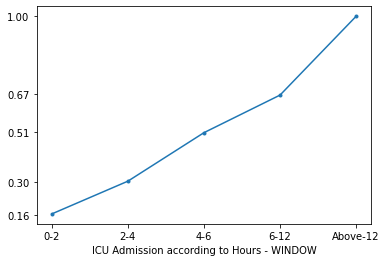

In [23]:
# To deduce the number of patients admitted into each windows:
aux = abs(df.groupby("PATIENT_VISIT_IDENTIFIER")["ICU"].sum() - 5)
aux = aux.value_counts().reset_index()
aux.sort_values(by="index", inplace=True)
aux.reset_index(drop=True, inplace=True)

total_icu_patients = aux.ICU[0:5].sum()
y = aux.ICU[0:5].cumsum() / total_icu_patients
plt.plot(y, marker=".")

plt.xlabel("ICU Admission according to Hours - WINDOW")
plt.yticks(round(y, 2))
plt.xticks([0, 1, 2, 3, 4], ["0-2", "2-4", "4-6", "6-12", "Above-12"])
plt.show()

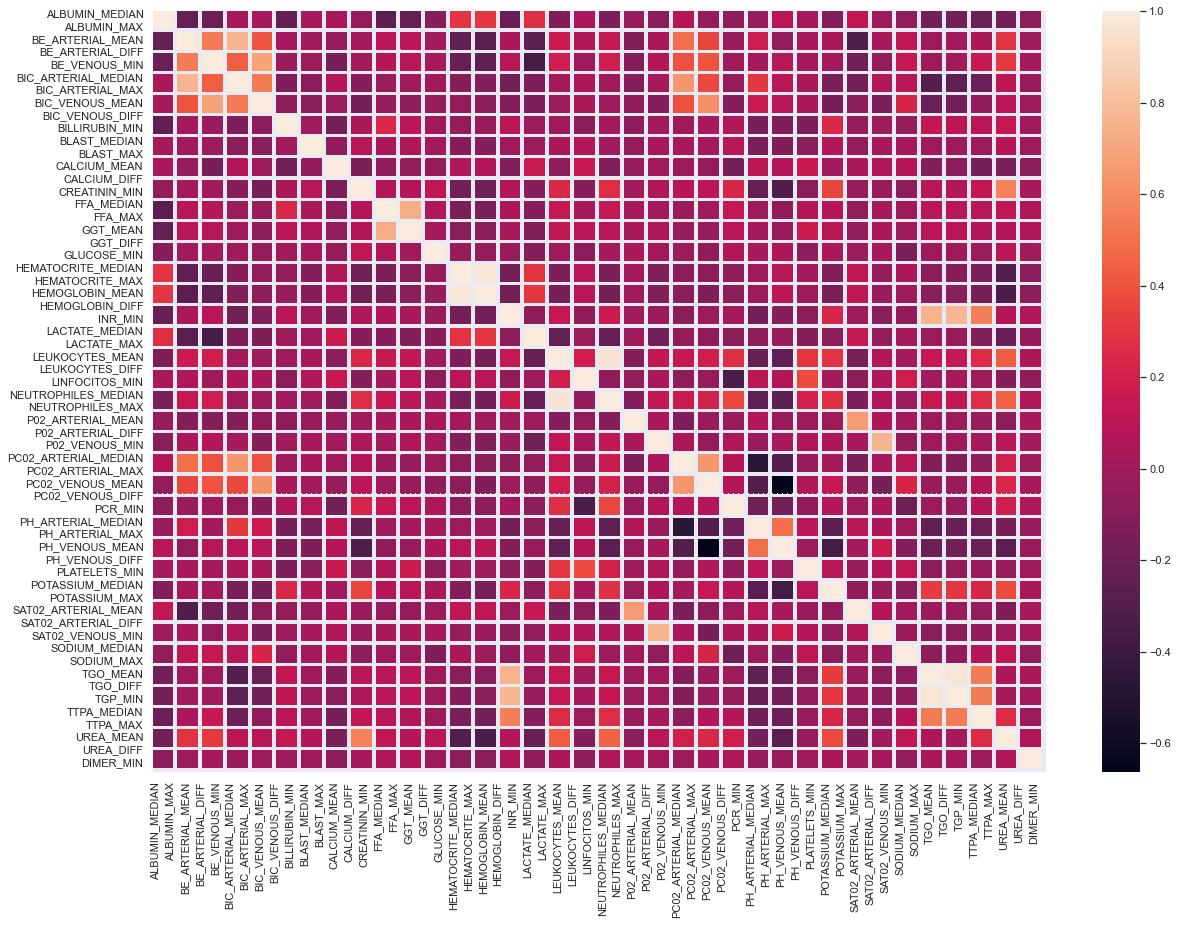

In [24]:
correlation = df1.corr()
sns.set(rc={"figure.figsize": (20, 14)})
sns.heatmap(correlation) 
plt.show()

In [25]:
df_range = df.iloc[: ,13:28]

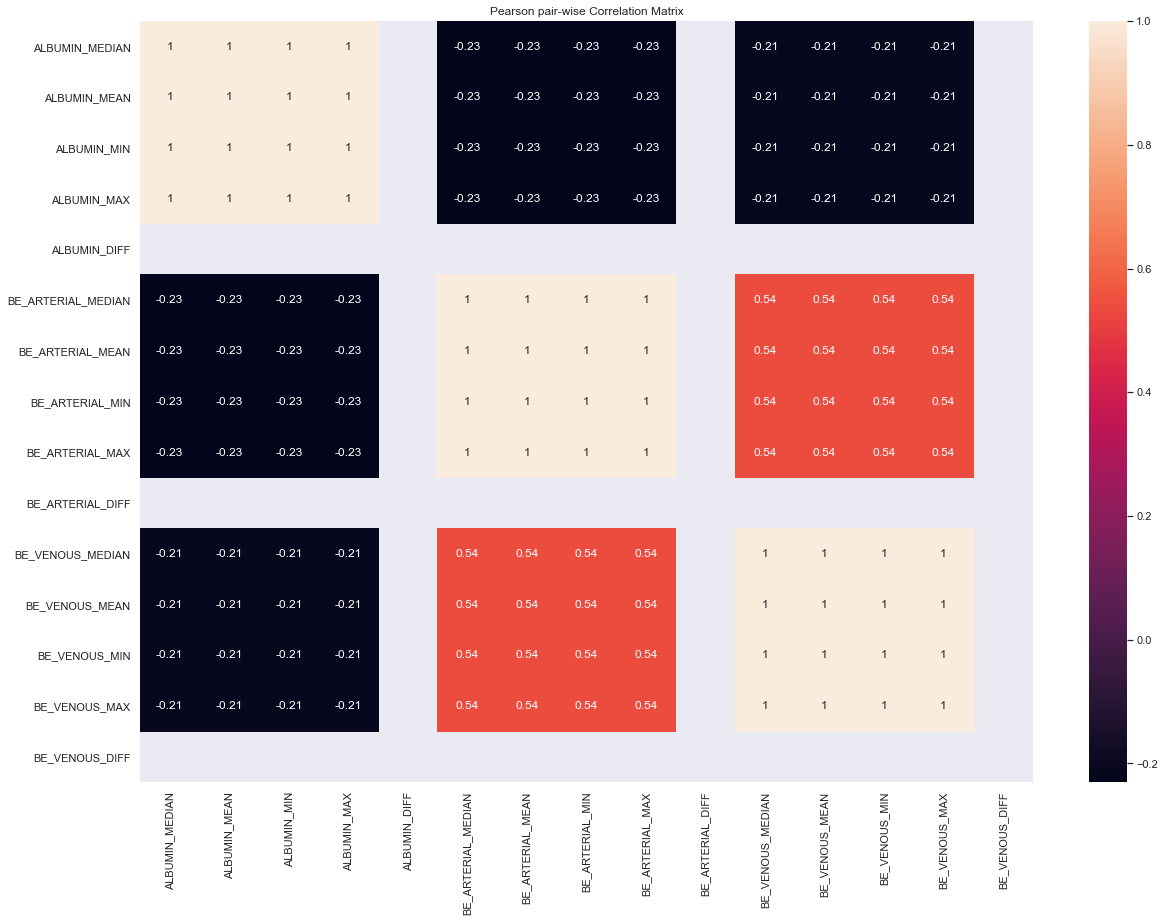

In [26]:
# compute the pair wise correlation for few columns with diff, mean, min, max
correlation_matrix = df_range.corr(method='pearson').round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Pearson pair-wise Correlation Matrix')
plt.show()

### Observation
 - It is evident that features with diff, mean, min and max do not contribute independently to the dataset, there is high probability that they result in overfitting, thus should be removed.
 - 1 feature will be sufficient.

In [27]:
# Relationship between patients admitted into ICU, window and not admitted into ICU

class PatientICU_Relationship:

    def __init__(self):
        self.patient_zero_two_hours = []
        self.patient_two_four_hours = []
        self.patient_four_six_hours = []
        self.patient_six_twelve_hours = []
        self.patient_above_12 = []
        self.healthy_patient = []
        self.back_to_normal_stage = []
        self.new_data = []


    def patient_number(self, icu_individual):
        
        for i in range(len(icu_individual.PATIENT_VISIT_IDENTIFIER)):

            if icu_individual.ICU[i][0] == 1:
                self.patient_zero_two_hours.append(icu_individual.PATIENT_VISIT_IDENTIFIER[i])
                if icu_individual.ICU[i][1] == 0 or icu_individual.ICU[i][2] == 0 or icu_individual.ICU[i][3] == 0 or icu_individual.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_individual.PATIENT_VISIT_IDENTIFIER[i])

            elif icu_individual.ICU[i][1] == 1:
                self.patient_two_four_hours.append(icu_individual.PATIENT_VISIT_IDENTIFIER[i])
                if icu_individual.ICU[i][2] == 0 or icu_individual.ICU[i][3] == 0 or icu_individual.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_individual.PATIENT_VISIT_IDENTIFIER[i]) 

            elif icu_individual.ICU[i][2] == 1:
                self.patient_four_six_hours.append(icu_individual.PATIENT_VISIT_IDENTIFIER[i])
                if icu_individual.ICU[i][3] == 0 or icu_individual.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_individual.PATIENT_VISIT_IDENTIFIER[i]) 

            elif icu_individual.ICU[i][3] == 1:
                self.patient_six_twelve_hours.append(icu_individual.PATIENT_VISIT_IDENTIFIER[i])
                if icu_individual.ICU[i][4] == 0 :
                    self.back_to_normal_stage.append(icu_individual.PATIENT_VISIT_IDENTIFIER[i]) 

            elif icu_individual.ICU[i][4] == 1:
                self.patient_above_12.append(icu_individual.PATIENT_VISIT_IDENTIFIER[i])

            elif icu_individual.ICU[i][4] == 0:
                self.healthy_patient.append(icu_individual.PATIENT_VISIT_IDENTIFIER[i])
        
        print("Patients admitted into ICU between 0 - 2 hours : {}".format(len(self.patient_zero_two_hours)))
        print("Patients admitted into ICU between 2 - 4 hours: {}".format(len(self.patient_two_four_hours)))
        print("Patients admitted into ICU between 4 - 6 hours: {}".format(len(self.patient_four_six_hours)))
        print("Patients admitted into ICU between 6 - 12 hours: {}".format(len(self.patient_six_twelve_hours)))
        print("Patients admitted into ICU after 12 hours: {}".format(len(self.patient_above_12)))
        print("Patients without ICU experience: {}".format(len(self.healthy_patient)))
        print("Patients that became healthy: {}".format(len(self.back_to_normal_stage)))
    
        self.new_data = [len(self.patient_zero_two_hours),
                         len(self.patient_two_four_hours),
                         len(self.patient_four_six_hours),
                         len(self.patient_six_twelve_hours),
                         len(self.patient_above_12),
                         len(self.healthy_patient)]
        
        
        return self.new_data, self.patient_zero_two_hours, self.patient_two_four_hours, self.patient_four_six_hours, self.patient_six_twelve_hours, self.patient_above_12, self.healthy_patient

    
total_number = PatientICU_Relationship()
new_data = total_number.patient_number(icu_individual)
    

Patients admitted into ICU between 0 - 2 hours : 32
Patients admitted into ICU between 2 - 4 hours: 27
Patients admitted into ICU between 4 - 6 hours: 40
Patients admitted into ICU between 6 - 12 hours: 31
Patients admitted into ICU after 12 hours: 65
Patients without ICU experience: 190
Patients that became healthy: 0


#### Observation
 - 32 patients got admitted into ICU within 0 to 2 hours of hospital admission
 - 27 patients got admitted into ICU within 2 to 4 hours of hospital admission
 - 40 patients got admitted into ICU within 4 to 6 hours of hospital admission
 - 31 patients got admitted into ICU within 6 to 12 hours of hospital admission
 - 65 patients got admitted into ICU after 12 hours of hospital admission
 - None of the patients left the ICU upon administration during the indicated windows

In [28]:
df['ICU'].value_counts()

0    1410
1     515
Name: ICU, dtype: int64

#### Observation
 - The quantity of patients not administered into ICU is less than those administered into ICU

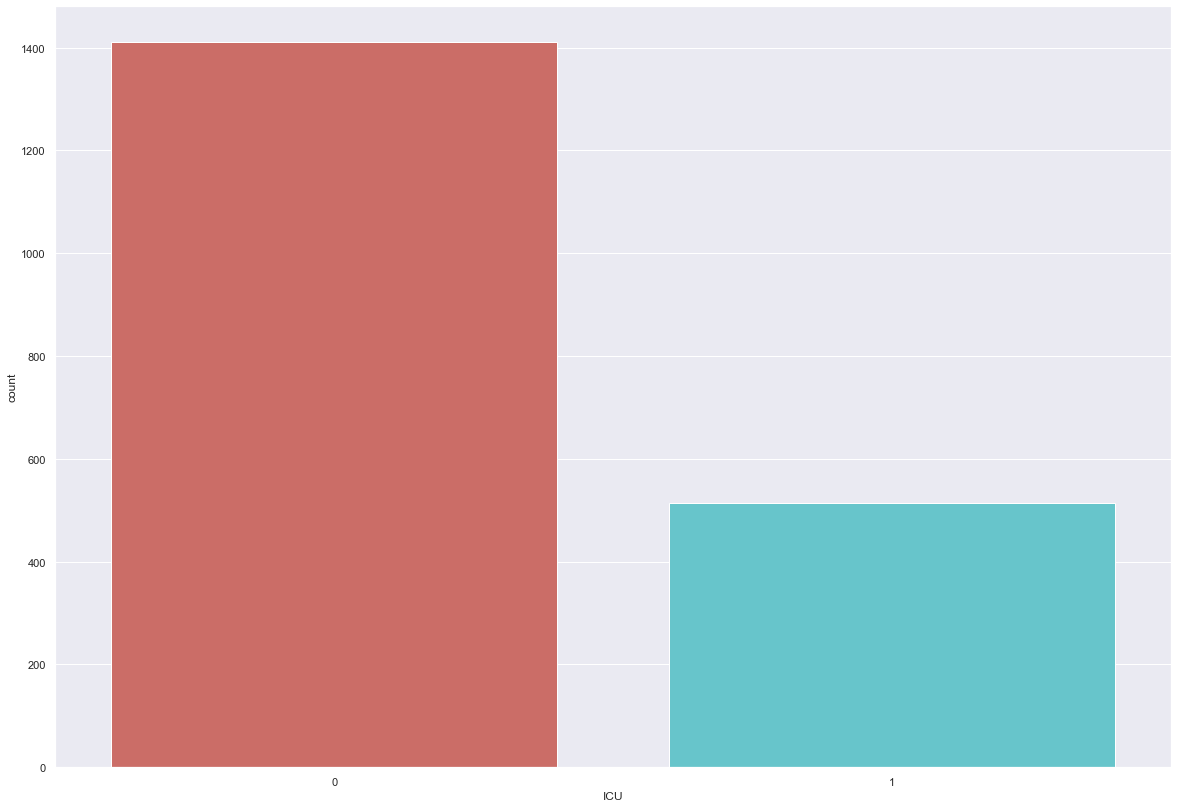

In [29]:
sns.countplot(x='ICU',data=df, palette='hls')
plt.show()

In [30]:
count_no_of_not_admitted_into_ICU = len(df[df['ICU']==0])
count_no_of_admitted_into_ICU= len(df[df['ICU']==1])
pct_of_not_admitted_into_ICU = count_no_of_not_admitted_into_ICU/(count_no_of_not_admitted_into_ICU+count_no_of_admitted_into_ICU)
print("percentage of patients not admitted into ICU", pct_of_not_admitted_into_ICU*100)
pct_of_admitted_into_ICU = count_no_of_admitted_into_ICU/(count_no_of_admitted_into_ICU+count_no_of_not_admitted_into_ICU)
print("percentage of patients admitted into ICU", pct_of_admitted_into_ICU*100)

percentage of patients not admitted into ICU 73.24675324675324
percentage of patients admitted into ICU 26.75324675324675


#### Observation:
    This is an imbalanced classification since the classes are not evenly distributed. From this type of dataset, the model may yield high accuracy and not contribute any added value in practice. Strategies to manage this issue include: 
 - Resampling Dataset through OverSampling of ICU = 1 and UnderSampling of ICU = 0 
 - Utilization of different algorithms
 - Measurement of Performance Metrics- Confusion Matrix, F-score, Recall, Precision, Kappa, ROC   curves

In [31]:
df.groupby("ICU").mean()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW
ICU,,,,,,,,,,,,,,,,,,,,,
0,195.193617,0.403546,49.070922,0.387943,0.096797,0.019929,0.083986,0.014947,0.110320,0.047687,...,-0.893231,-0.850633,-0.945303,-0.881130,-0.846205,-0.886281,-0.890232,-0.851467,-0.945425,1.718440
1,183.256311,0.642718,64.485437,0.316505,0.139806,0.050485,0.135922,0.033010,0.176699,0.044660,...,-0.394131,-0.631953,-0.785670,-0.628478,-0.496603,-0.699652,-0.439745,-0.633211,-0.784869,2.770874


#### Observation
 - The percentage of female patients not admitted into ICU is more than the percentage of male patients admitted into ICU

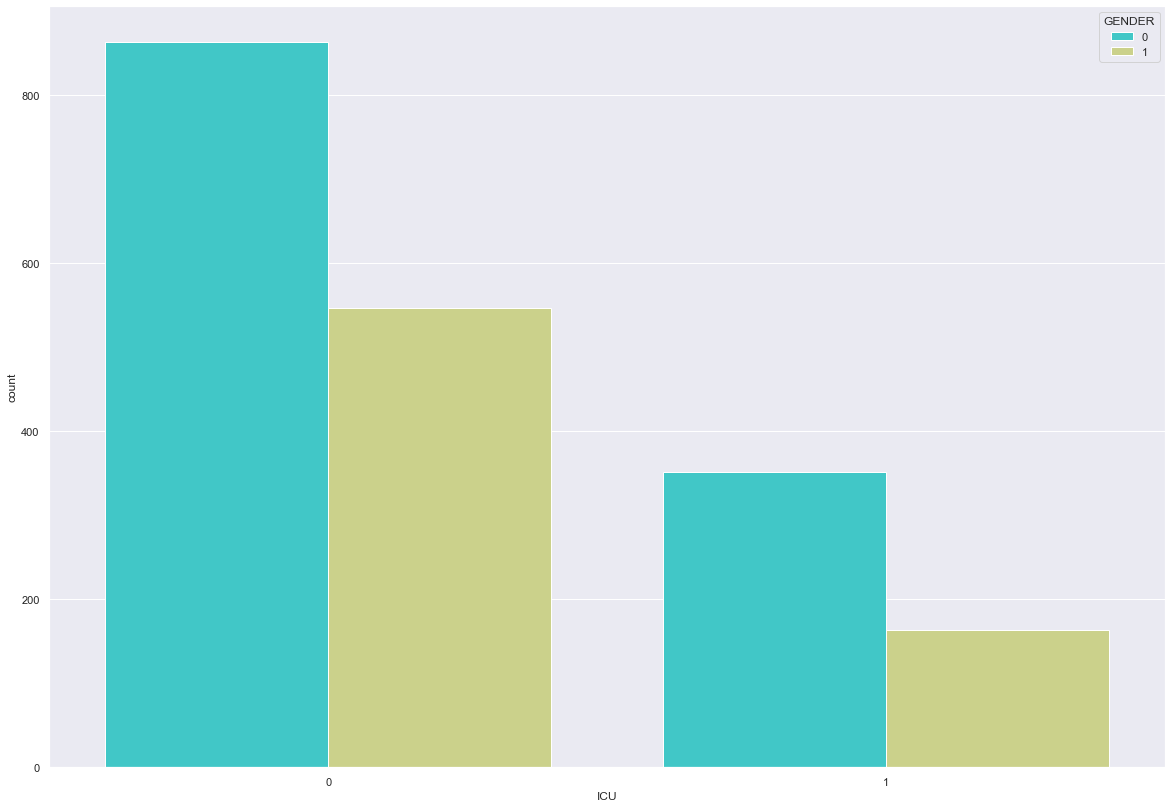

In [32]:
sns.countplot(x='ICU',hue = "GENDER", data=df, palette='rainbow')
plt.show()

#### Observation
 - The ratio of females not admitted into ICU is more than that of males not admitted
 - The ratio of males admitted into ICU is less than that of females admitted

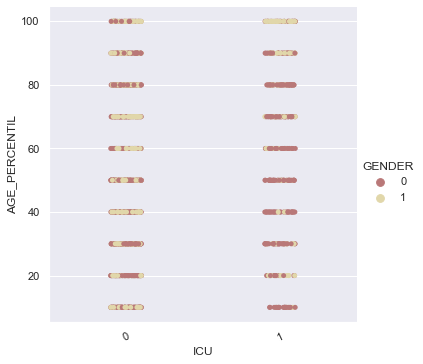

In [33]:
viz = sns.catplot(x='ICU', y = "AGE_PERCENTIL", hue = 'GENDER', data=df, palette='pink', ci = "sd")
viz.set_xticklabels(rotation = 25);

#### Observation
 - Patients most admitted into ICU were elderly, above 90th percentile
 - Patients least admitted into ICU were those in the 10th age percentile
 - Patients least not admitted into ICU were in the 90th age percentile
 - Patients most not admitted into ICU were in the 20th age percentile

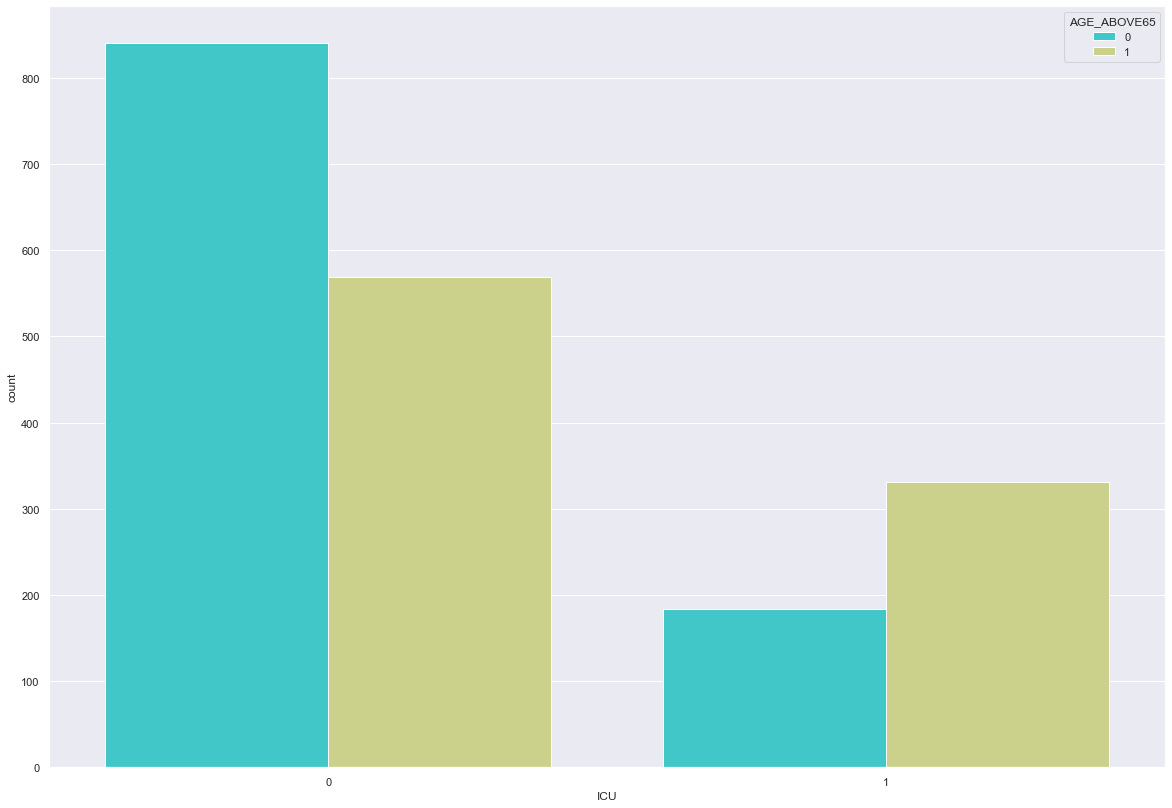

In [34]:
sns.countplot(x='ICU',hue = "AGE_ABOVE65", data=df, palette='rainbow')
plt.show()

#### Observation
 - The ratio of patients above 65 years admitted into ICU is less that those not admitted
 - The ratio of female aged patients not admitted into ICU is more than that of male
 - The ratio of male aged patients admitted into ICU is more that that of females

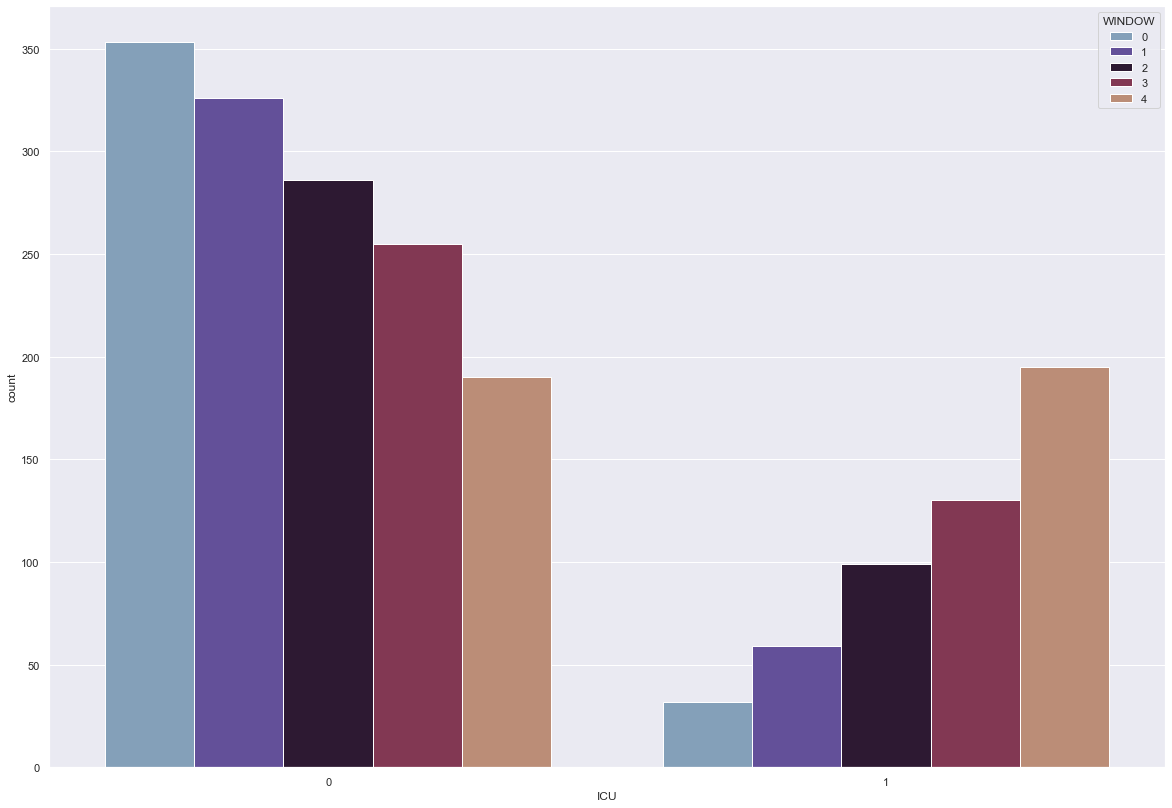

In [35]:
sns.countplot(x='ICU',hue = 'WINDOW', data=df, palette='twilight')
plt.show()

#### Observation
 - Most patients admitted into ICU were after 12 hours of admission into the hospital
 - Least patients admitted into ICU were within the first 2 hours of admission into the hospital
 - Within the first 2 hours of hospital admission,a lot of patients were not admitted into the ICU
 - After 12 hours of hospital admission, a lot of patients were transferred into the ICU.

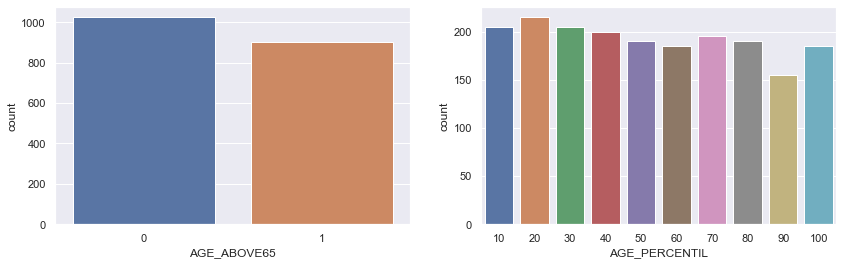

In [206]:
#AGE_ABOVE65 and AGE_PERCENTIL
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sns.countplot(df['AGE_ABOVE65'], ax=axis[0])
sns.countplot(df['AGE_PERCENTIL'], ax=axis[1])
plt.show(fig)

#### Observation
 - The two variables are fairly distributed in the dataset

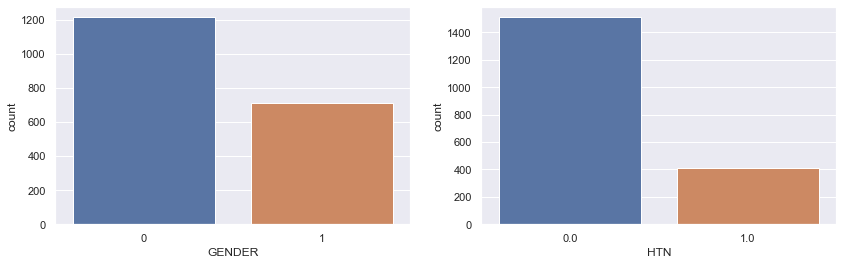

In [207]:
#GENDER and HTN
fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14, 4))
sns.countplot(df['GENDER'], ax=axis[0])
sns.countplot(df['HTN'], ax=axis[1])
plt.show(fig)

#### Observation
 - Gender and HTN are not fairly distributed in the dataset

Text(0, 0.5, 'ICU')

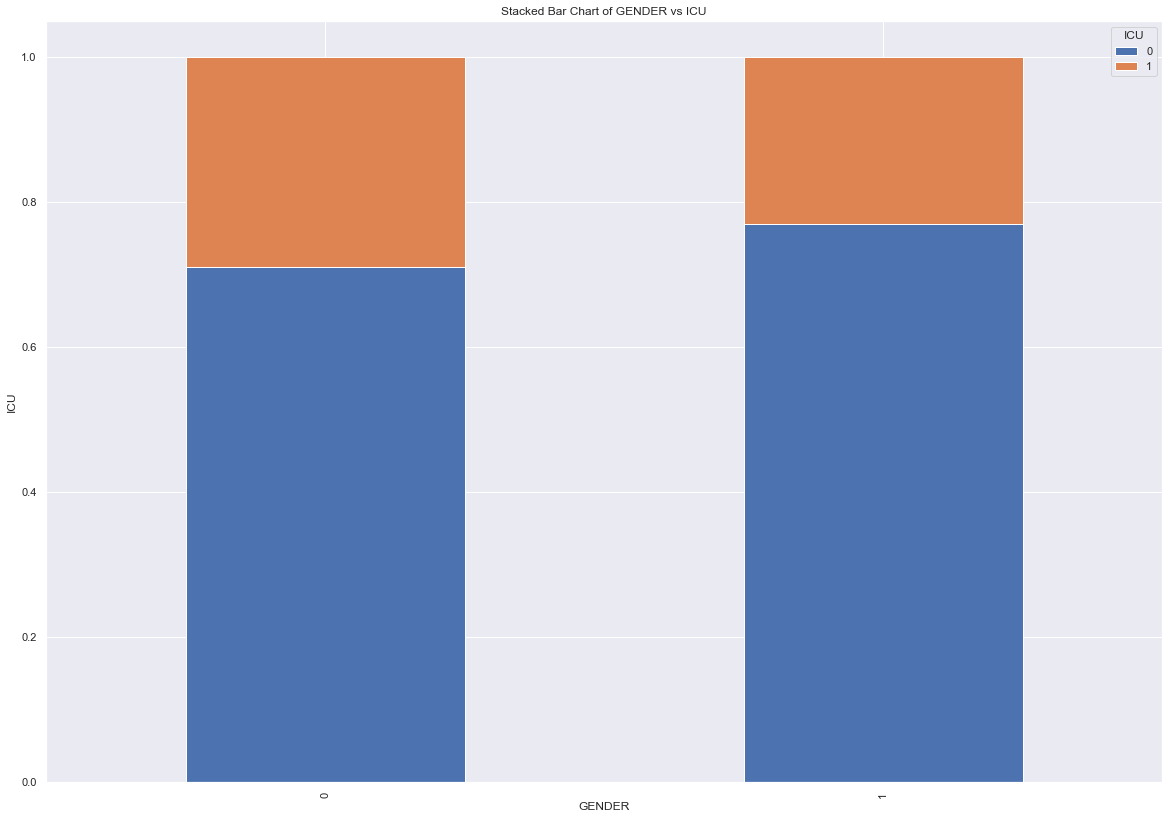

In [36]:
table=pd.crosstab(df.GENDER,df.ICU)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of GENDER vs ICU')
plt.xlabel('GENDER')
plt.ylabel('ICU')

#### Observation
 - Gender does not seem to be a strong predictor for the outcome variable

Text(0, 0.5, 'ICU')

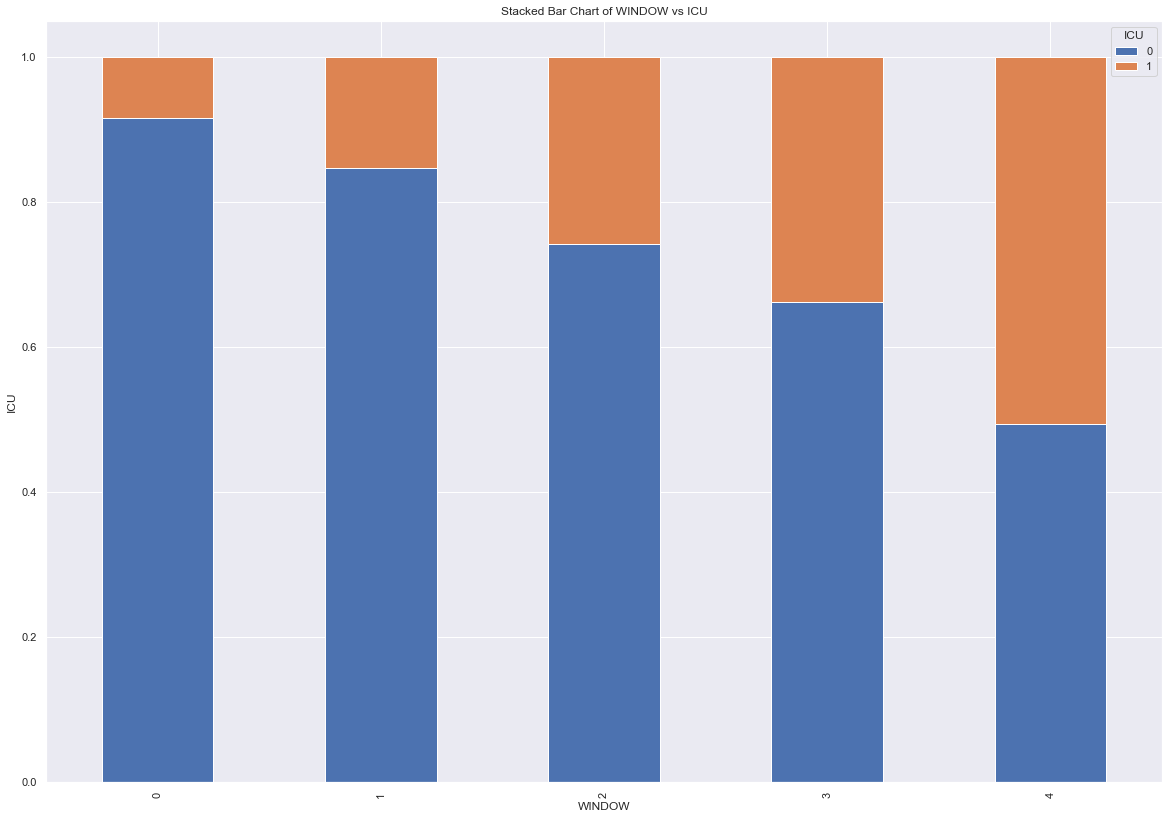

In [37]:
table=pd.crosstab(df.WINDOW,df.ICU)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of WINDOW vs ICU')
plt.xlabel('WINDOW')
plt.ylabel('ICU')

#### Observation
 - Window seems to be a strong predictor of the outcome variable

NaN values = 223863

Variable DISEASE GROUPING 1 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 2 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 3 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 4 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 5 has 5 records (0.26%) with missing values.
Variable DISEASE GROUPING 6 has 5 records (0.26%) with missing values.
Variable HTN has 5 records (0.26%) with missing values.
Variable IMMUNOCOMPROMISED has 5 records (0.26%) with missing values.
Variable OTHER has 5 records (0.26%) with missing values.
Variable ALBUMIN_MEDIAN has 1104 records (57.35%) with missing values.
Variable ALBUMIN_MEAN has 1104 records (57.35%) with missing values.
Variable ALBUMIN_MIN has 1104 records (57.35%) with missing values.
Variable ALBUMIN_MAX has 1104 records (57.35%) with missing values.
Variable ALBUMIN_DIFF has 1104 records (57.35%) with missing values.
Variable BE_ARTERIAL_MED

<AxesSubplot:>

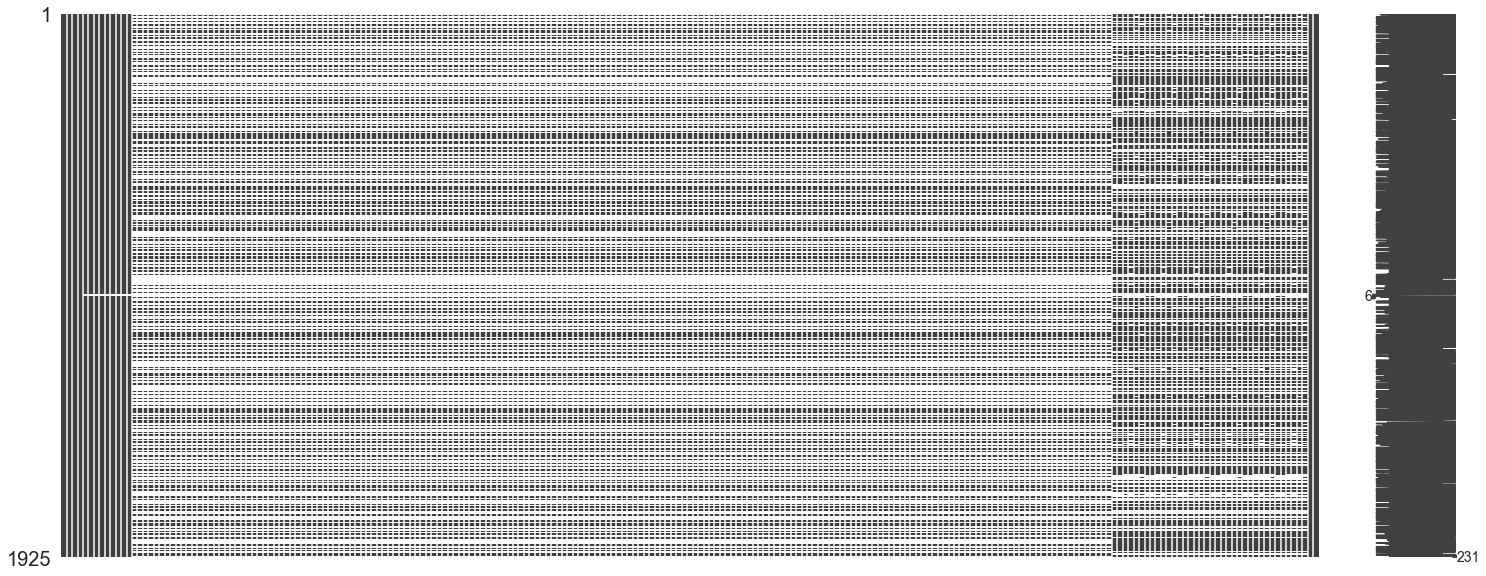

In [38]:
# Visualize missing values
print('NaN values =', df.isnull().sum().sum())
print("""""")
vars_with_missing = []
for feature in df.columns:
    missings = df[feature].isna().sum()
    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / df.shape[0]
        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

import missingno as msno  
%matplotlib inline
msno.matrix(df)

#### Observation
- Due to the enormous amount of missing values and features, the matrix doesn't portray explicitly the features

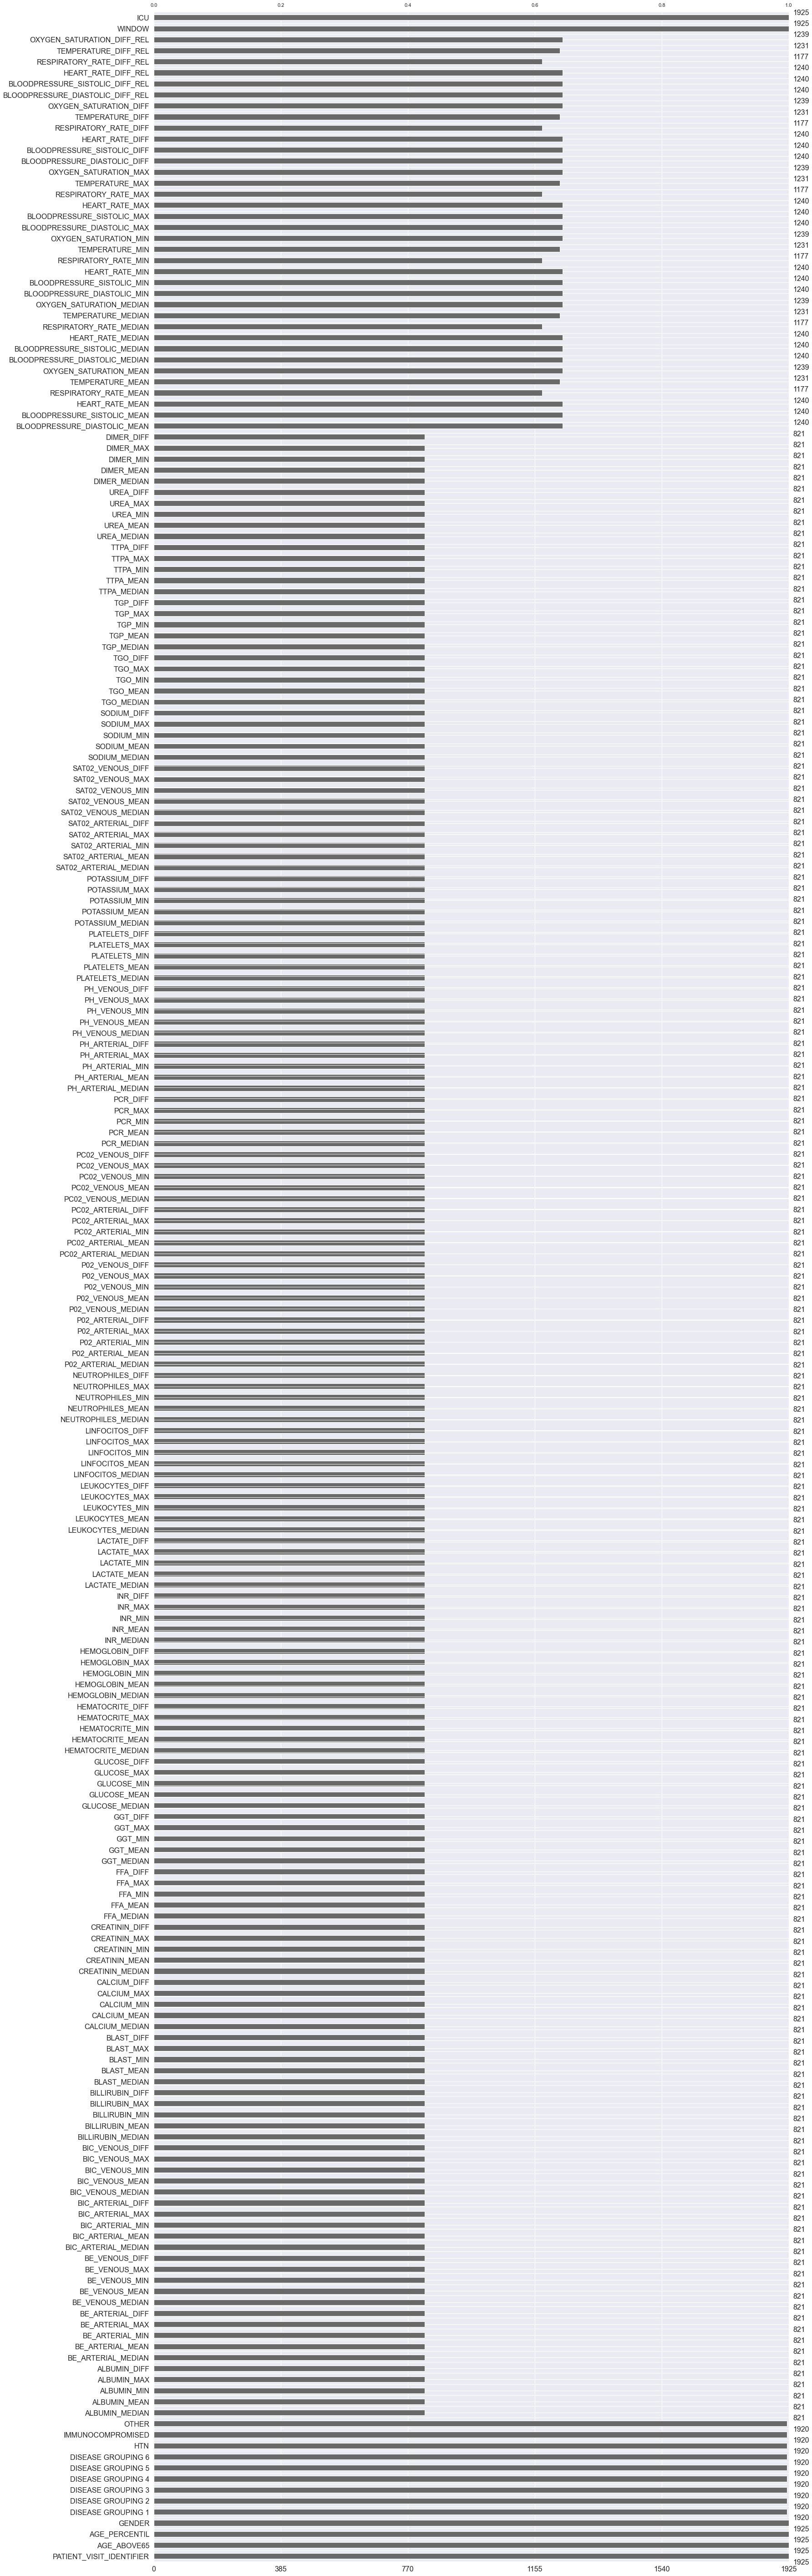

In [39]:
msno.bar(df);

#### Observation
 - The dataset contains a lot of missing values

#### Identify the percentage of missing values present in the dataset

In [ ]:
for idx, col in enumerate(df.isnull().sum().index.tolist()):

  print(f'{(df.isnull().sum()[idx] / df.shape[0] * 100).round(2)}% of all values in {col} are missing')

In [ ]:
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = False)

# 2.0 Data Preparation For Machine Learning


## 2.1 Data Cleaning

Based on the report given on the dataset. The missing values can be replaced with backward and forward entries. 

In [43]:
# filling the NaN values in the dataset with the previous and next entries
def fix_tabel(df):
    cont_features_cols = df.iloc[:,4:-2].columns
    cont_features = df.groupby('PATIENT_VISIT_IDENTIFIER', as_index=False)[cont_features_cols].fillna(method='bfill').fillna(method='ffill')
    cat_features  = df.iloc[:,:4]
    output = df.iloc[:,-2:]
    df_final = pd.concat([cat_features,cont_features, output], ignore_index = True, axis=1)
    df_final.columns = df.columns
    return df_final

In [44]:
df_cleaned = fix_tabel(df)
df_cleaned.head()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
0,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0,0
1,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1,0
2,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,2,0
3,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,3,0
4,0,1,60,0,0.0,0.0,0.0,0.0,1.0,1.0,...,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,4,1


NaN values = 0

In total, there are 0 variables with missing values


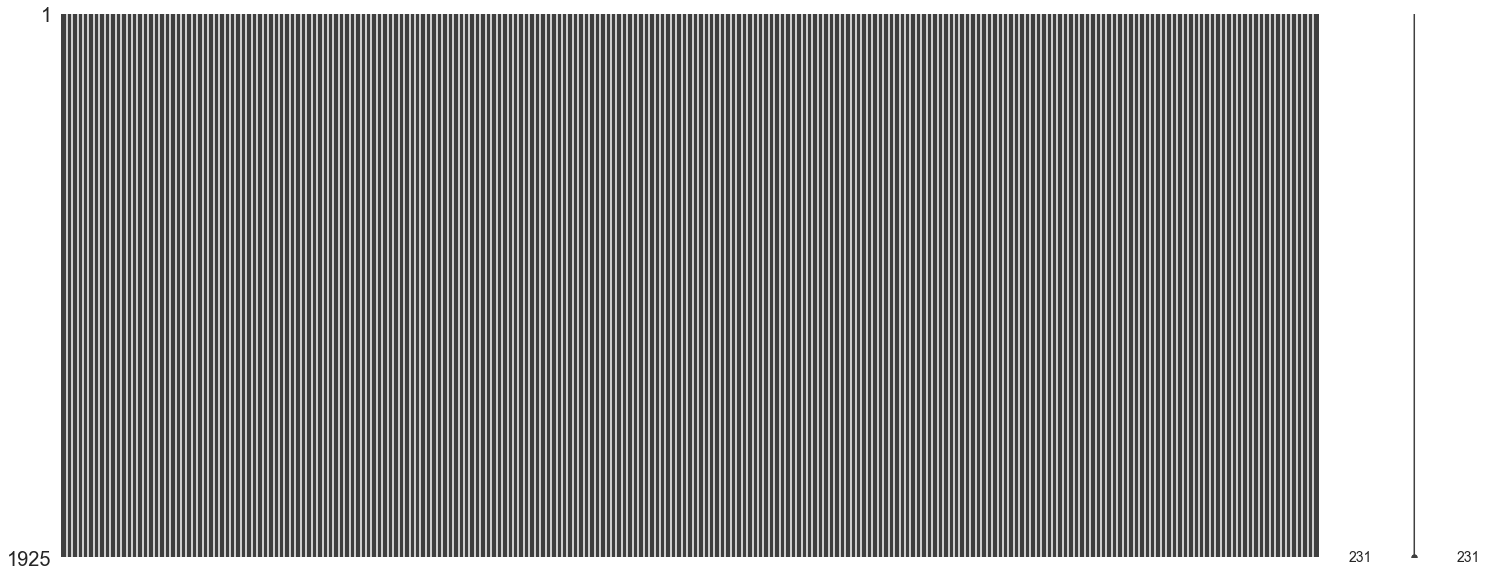

In [45]:
msno.matrix(df_cleaned)
print('NaN values =', df_cleaned.isnull().sum().sum())
print("""""")

vars_with_missing = []
for feature in df_cleaned.columns:
    missings = df_cleaned[feature].isna().sum()
    if missings > 0 :
        vars_with_missing.append(feature)
        missings_perc = missings / df_cleaned.shape[0]
        print('Variable {} has {} records ({:.2%}) with missing values.'.format(feature, missings, missings_perc))
print('In total, there are {} variables with missing values'.format(len(vars_with_missing)))

#### Observation
 - There are no NaN values in the dataset

### 2.1.1 Imbalanced Classes
 - As indicated above, the dataset will be balanced using the imbalanced learn library

In [ ]:
!pip install -U imbalanced-learn

In [ ]:
conda install -c conda-forge imbalanced-learn

In [ ]:
 conda update -n base -c conda-forge conda

In [58]:
df_balance = df_cleaned
df.ICU.value_counts(0)

0    1410
1     515
Name: ICU, dtype: int64

In [59]:
df_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1925 entries, 0 to 1924
Columns: 231 entries, PATIENT_VISIT_IDENTIFIER to ICU
dtypes: float64(225), int64(6)
memory usage: 3.4 MB


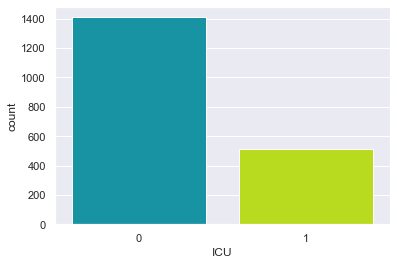

In [60]:
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=df_balance.ICU,palette='nipy_spectral')
plt.show()

[(0, 1410), (1, 1410)]


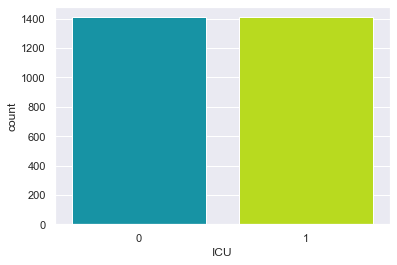

In [63]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df_balance, df_balance.ICU)

print(sorted(Counter(y_resampled).items()))
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=y_resampled,palette='nipy_spectral')
plt.show()

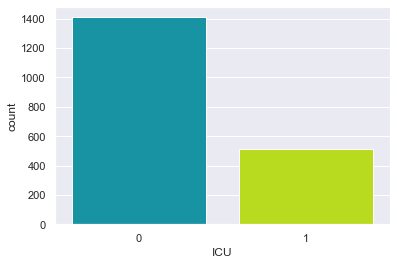

In [67]:
sns.set_style('white')
sns.set(font_scale=1)
plt.figure()
sns.countplot(x=df_balance['ICU'],palette='nipy_spectral')
plt.show()

## 2.2 Feature Engineering

### Creating dummy variables

In [68]:
# Create a sample from train_savepoint
df_cleaned_data = df_cleaned.sample(1000)
y = df_cleaned_data['ICU']

In [69]:
pd.DataFrame(df_cleaned_data['DISEASE GROUPING 1'])

,DISEASE GROUPING 1
1346,0.0
743,1.0
932,0.0
628,0.0
84,0.0
...,...
1744,0.0
1395,0.0
1235,0.0
1547,0.0


In [70]:
dummy = pd.get_dummies(df_cleaned_data['DISEASE GROUPING 1'], prefix='DISEASE GROUPING 1 ', drop_first=False)

In [71]:
dummy

,DISEASE GROUPING 1 _0.0,DISEASE GROUPING 1 _1.0
1346,1,0
743,0,1
932,1,0
628,1,0
84,1,0
...,...,...
1744,1,0
1395,1,0
1235,1,0
1547,1,0


NaN values = 0


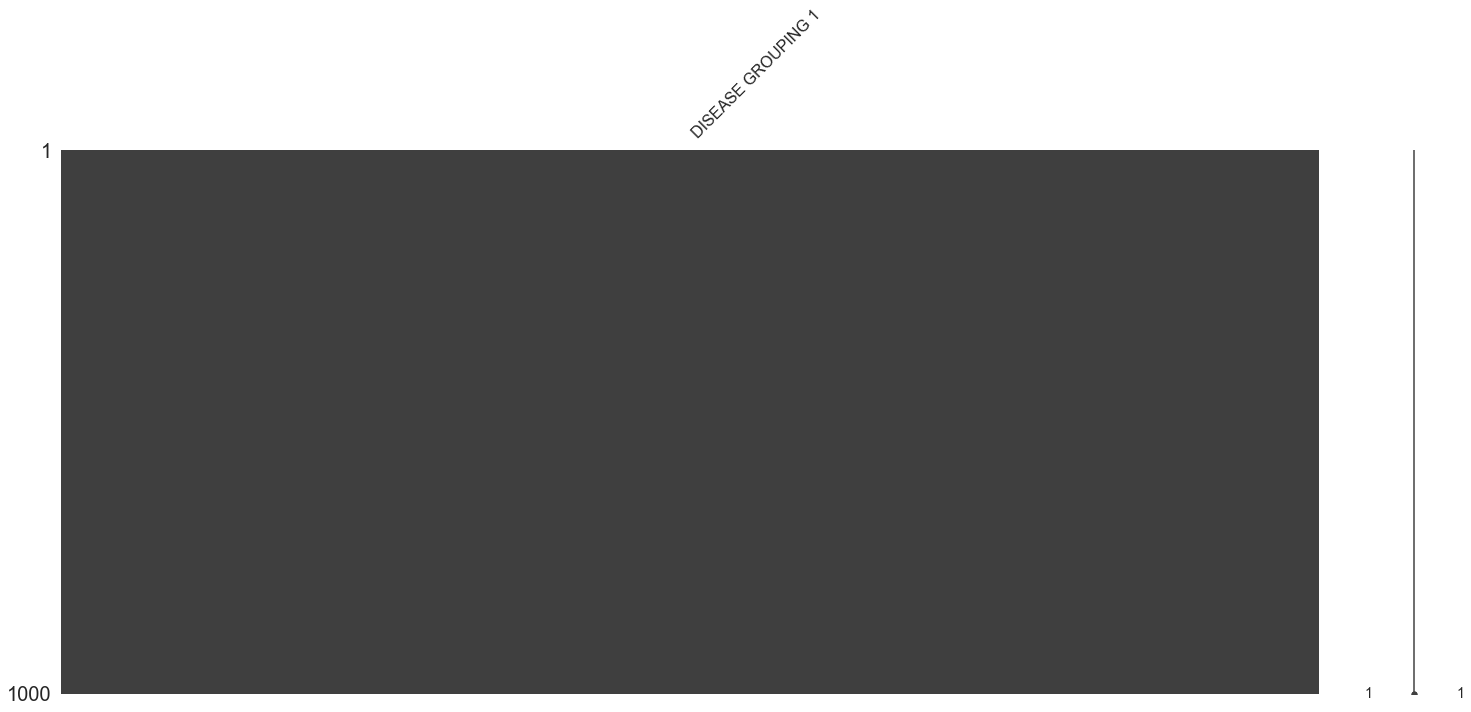

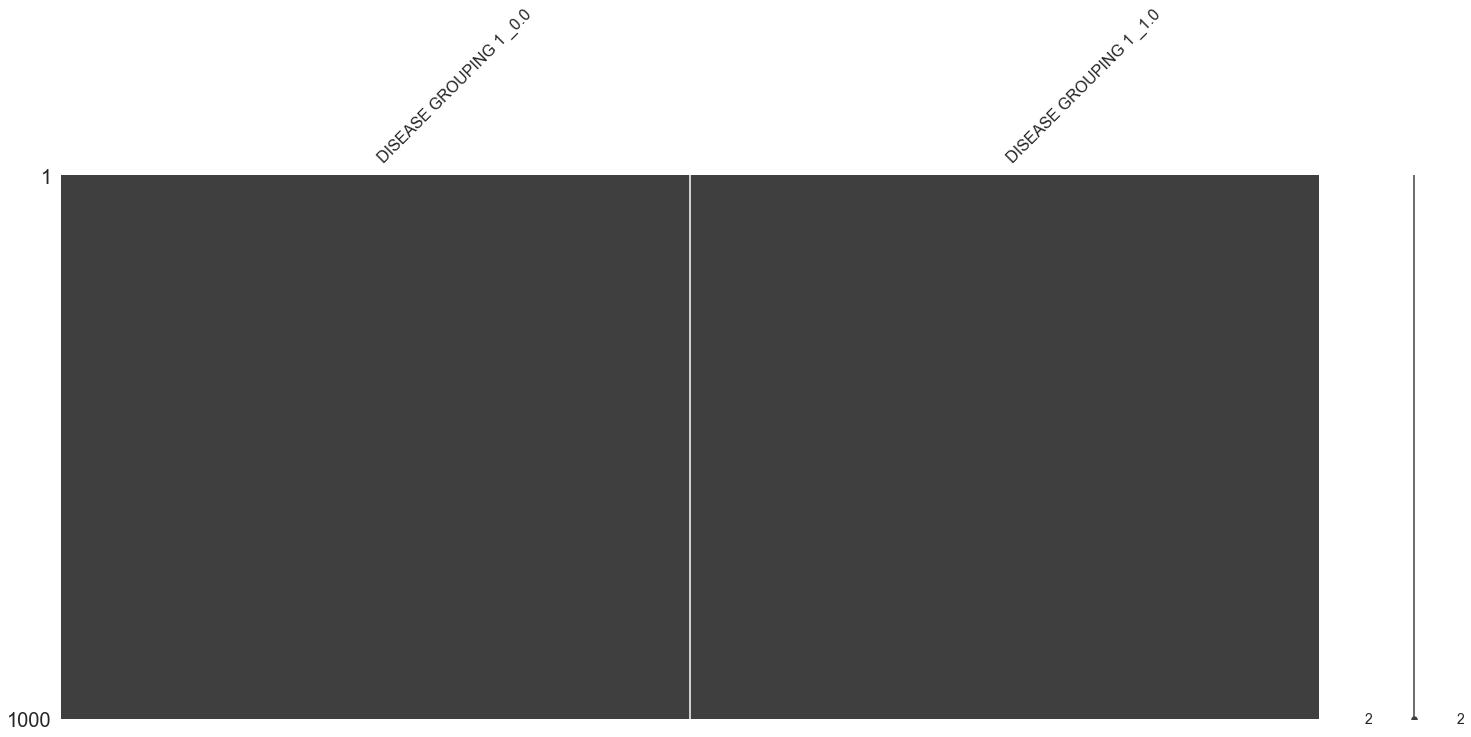

In [72]:
print('NaN values =', 
      df_cleaned_data['DISEASE GROUPING 1'].isnull().sum().sum())
msno.matrix(pd.DataFrame(df_cleaned_data['DISEASE GROUPING 1']))
msno.matrix(dummy)
plt.show()

Finally, we create dummy variables for all the categorical variables

In [73]:
df_range = df.iloc[: ,13:28]

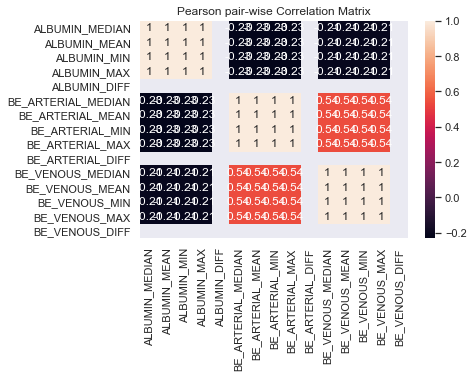

In [74]:
# compute the pair wise correlation for all columns
correlation_matrix = df_range.corr(method='pearson').round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Pearson pair-wise Correlation Matrix')
plt.show()

#### Observation
 - A lot of features are highly correlated

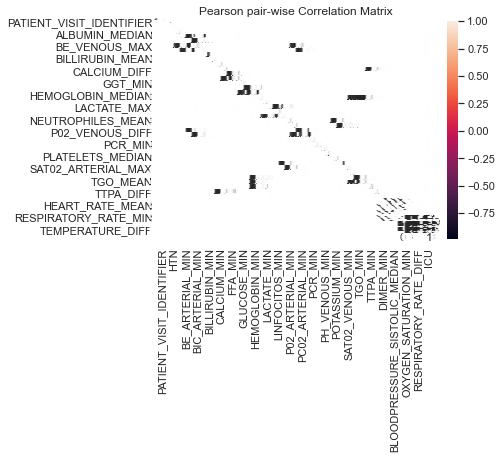

In [76]:
# compute the pair wise correlation for all columns
correlation_matrix = df.corr(method='pearson').round(2)
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.title('Pearson pair-wise Correlation Matrix')
plt.show()

## 2.3 Feature Selection

In [78]:
selector = VarianceThreshold(threshold=0.01) # Setting threshold of 1% low variance features
selector.fit(df_cleaned.drop(['ICU', 'PATIENT_VISIT_IDENTIFIER', "WINDOW"], axis=1)) # Fit to train without id and target variables

f = np.vectorize(lambda x : not x) # Function to toggle boolean array elements

v = df_cleaned.drop(['ICU', 'PATIENT_VISIT_IDENTIFIER', "WINDOW"], axis=1).columns[f(selector.get_support())]
print('{} variables have too low variance.'.format(len(v)))
print('These variables are {}'.format(list(v)))

56 variables have too low variance.
These variables are ['ALBUMIN_DIFF', 'BE_ARTERIAL_DIFF', 'BE_VENOUS_DIFF', 'BIC_ARTERIAL_DIFF', 'BIC_VENOUS_DIFF', 'BILLIRUBIN_MEDIAN', 'BILLIRUBIN_MEAN', 'BILLIRUBIN_MIN', 'BILLIRUBIN_MAX', 'BILLIRUBIN_DIFF', 'BLAST_DIFF', 'CALCIUM_DIFF', 'CREATININ_DIFF', 'FFA_DIFF', 'GGT_DIFF', 'GLUCOSE_DIFF', 'HEMATOCRITE_DIFF', 'HEMOGLOBIN_DIFF', 'INR_MEDIAN', 'INR_MEAN', 'INR_MIN', 'INR_MAX', 'INR_DIFF', 'LACTATE_DIFF', 'LEUKOCYTES_DIFF', 'LINFOCITOS_DIFF', 'NEUTROPHILES_DIFF', 'P02_ARTERIAL_DIFF', 'P02_VENOUS_DIFF', 'PC02_ARTERIAL_MEDIAN', 'PC02_ARTERIAL_MEAN', 'PC02_ARTERIAL_MIN', 'PC02_ARTERIAL_MAX', 'PC02_ARTERIAL_DIFF', 'PC02_VENOUS_DIFF', 'PCR_DIFF', 'PH_ARTERIAL_DIFF', 'PH_VENOUS_DIFF', 'PLATELETS_DIFF', 'POTASSIUM_DIFF', 'SAT02_ARTERIAL_DIFF', 'SAT02_VENOUS_DIFF', 'SODIUM_DIFF', 'TGO_MEDIAN', 'TGO_MEAN', 'TGO_MIN', 'TGO_MAX', 'TGO_DIFF', 'TGP_MEDIAN', 'TGP_MEAN', 'TGP_MIN', 'TGP_MAX', 'TGP_DIFF', 'TTPA_DIFF', 'UREA_DIFF', 'DIMER_DIFF']


#### Observation:
 - We would lose rather many variables if we would select based on variance. 
 - Alternatively, we will use SklearnFromModel to select the best features. 

### Since the dataset has been scaled and contains negative values, we can either normalize the variables or utilize ANOVA (f-classif) scoring function.  

In [79]:
X, y = make_classification(
    n_features=20,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=2,
    random_state=42,
)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [80]:
def ANOVA():
    print()
    print(format("How to select features using best ANOVA F-values in Python", "*^82"))
    import warnings
    warnings.filterwarnings("ignore")
    
    # Choose features and target
    features = df_cleaned.iloc[:, :-1]
    X = features; print(); print(X)
    y = df_cleaned.ICU; print(); print(y)
    
    # Select Features with Best ANOVA F-Values
    # Create an SelectKBest object to select features with two best ANOVA F-Values
    fvalue_selector = SelectKBest(f_classif, k=100)
    # Apply the SelectKBest object to the features and target
    X_kbest = fvalue_selector.fit_transform(X, y)
    print(); print(X_kbest)
    
    # Show results
    print("Original number of features:", X.shape)
    print("Reduced number of features:", X_kbest.shape)
    
ANOVA()


************How to select features using best ANOVA F-values in Python************

      PATIENT_VISIT_IDENTIFIER  AGE_ABOVE65  AGE_PERCENTIL  GENDER  \
0                            0            1             60       0   
1                            0            1             60       0   
2                            0            1             60       0   
3                            0            1             60       0   
4                            0            1             60       0   
...                        ...          ...            ...     ...   
1920                       384            0             50       1   
1921                       384            0             50       1   
1922                       384            0             50       1   
1923                       384            0             50       1   
1924                       384            0             50       1   

      DISEASE GROUPING 1  DISEASE GROUPING 2  DISEASE GROUPING 3  \
0     

#### Observation
 - The closer the variance is to the mean, the lower it is
 - The further the variance is to the mean, the higher it is
 - A dataset that has variables with high variance will contribute independently to development of the model  as a result of meaningful patterns contributed by the data points.


In [81]:
X = df_cleaned.iloc[:, :-1]
y = df_cleaned.iloc[:, -1]

X_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [89]:
x_test.shape

(578, 230)

In [90]:
y_test.shape

(578,)

In [87]:
X_train.shape


(1347, 230)

In [88]:
y_train.shape

(1347,)

In [83]:
X, y = load_digits(return_X_y=True)
X.shape


(1797, 64)

In [91]:
selector.scores_

array([1.46189387e+00, 8.03405035e+01, 1.03225709e+02, 1.86507505e+00,
       1.66191711e+01, 1.24593853e+01, 4.80285932e+00, 7.46888518e+00,
       1.13106461e+01, 6.63884871e-02, 4.94252431e+01, 2.61201897e+00,
       3.40727334e+00, 3.98102378e+01, 3.98102378e+01, 3.98102378e+01,
       3.98102378e+01,            nan, 4.13650264e+01, 4.13650264e+01,
       4.13650264e+01, 4.13650264e+01,            nan, 6.82442745e+01,
       6.82442745e+01, 6.82442745e+01, 6.82442745e+01,            nan,
       1.33882914e+01, 1.33882914e+01, 1.33882914e+01, 1.33882914e+01,
                  nan, 8.45279581e+00, 8.45279581e+00, 8.45279581e+00,
       8.45279581e+00,            nan, 4.85812571e-01, 4.85812571e-01,
       4.85812571e-01, 4.85812571e-01,            nan, 9.88549040e-01,
       9.88549040e-01, 9.88549040e-01, 9.88549040e-01,            nan,
       7.90788460e+00, 7.90788460e+00, 7.90788460e+00, 7.90788460e+00,
                  nan, 2.94529234e+00, 2.94529234e+00, 2.94529234e+00,
      

####  Observation
 - This values indicate the k-scores of 100 best variables
 - The NaN are variables without K-scores

In [92]:
cols = selector.get_support(indices= True)
cols

array([  1,   2,   4,   5,  10,  13,  14,  15,  16,  18,  19,  20,  21,
        23,  24,  25,  26,  28,  29,  30,  31,  73,  74,  75,  76,  78,
        79,  80,  81,  84,  85,  86,  88,  89,  90,  91,  93,  94,  95,
        96, 103, 104, 105, 106, 113, 114, 115, 116, 123, 124, 125, 126,
       143, 144, 145, 146, 148, 149, 150, 151, 178, 179, 180, 181, 183,
       184, 185, 186, 193, 194, 196, 197, 199, 200, 202, 203, 205, 206,
       207, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,
       221, 222, 223, 224, 225, 226, 227, 228, 229], dtype=int64)

#### Observation
 - The columns that contribute greatly to the model are arranged in their index number

In [97]:
anova_filter = SelectKBest(f_classif, k=3)
clf = LinearSVC()
anova_svm = make_pipeline(anova_filter, clf)
anova_svm.fit(X_train, y_train)

Pipeline(steps=[('selectkbest', SelectKBest(k=3)), ('linearsvc', LinearSVC())])

In [98]:
df_to_remove = df_cleaned.query('WINDOW == 0 and ICU ==1')['PATIENT_VISIT_IDENTIFIER'].values
df_final = df_cleaned.query('PATIENT_VISIT_IDENTIFIER not in @df_to_remove')
df_final = df_final.dropna()
df_final.describe()

,PATIENT_VISIT_IDENTIFIER,AGE_ABOVE65,AGE_PERCENTIL,GENDER,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,...,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,WINDOW,ICU
count,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,...,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000,1765.000000
mean,192.835694,0.456091,52.662890,0.379603,0.112181,0.026062,0.101416,0.021530,0.132578,0.049292,...,-0.822811,-0.915604,-0.827971,-0.774383,-0.854506,-0.788237,-0.823775,-0.915560,2.000000,0.201133
std,110.481302,0.498209,28.882085,0.485426,0.315679,0.159366,0.301965,0.145183,0.339214,0.216538,...,0.276154,0.247344,0.287526,0.367897,0.240022,0.383863,0.274823,0.247742,1.414614,0.400961
min,0.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000
25%,98.000000,0.000000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,0.000000
50%,192.000000,0.000000,50.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,2.000000,0.000000
75%,289.000000,1.000000,80.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-0.738095,-0.919192,-0.721739,-0.646644,-0.771835,-0.756272,-0.734427,-0.920103,3.000000,0.000000
max,384.000000,1.000000,100.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.333333,1.000000,1.000000,1.000000,1.000000,1.000000,0.329660,1.000000,4.000000,1.000000


#### Observation
- In the absence of missing/Nan values, feature selection should be employed to ensure appropriate variables are used to develop the model.
- The dataset will be grouped into X(independent) and y(dependent) variable
 - At this section it will be tested some different procedures to select the testing features to guarantee a better model.
 - As defined in the scope of the data presented by Sírio Libanês Hospital, the target value to be obtained is to define if a patient will be sent to ICU or not. Besides that, it is important to determine as soon as possible if the patient will demand ICU treatment.
- Using this premises, it is possible to specify that the column ICU is the problem dependent variable. Furthermore, the column WINDOW will work as a kind of filter to determine the amount of information that will be used on the study.

In [ ]:
# Define the initial variables
X = df_final.drop(['ICU', 'WINDOW'], axis=1)
y = df_final['ICU']

## 2.4 Dimensionality Reduction

### 2.4.1 Libraries Importation

In [103]:
from sklearn.datasets import make_classification
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from numpy import mean
from numpy import std
import pandas as pd

### 2.4.2 Applying PCA to the brazil dataset

In [104]:
X=df_cleaned.drop(['ICU', 'PATIENT_VISIT_IDENTIFIER'], axis=1)
y=df_cleaned['ICU']

In [105]:
pca = PCA(n_components=229)
x_pca = pca.fit_transform(df_cleaned.drop(['ICU', 'PATIENT_VISIT_IDENTIFIER'], axis=1))

In [106]:
pca.explained_variance_ratio_

array([9.84614263e-01, 4.69516618e-03, 2.94667432e-03, 8.10202256e-04,
       5.43181075e-04, 4.89119121e-04, 4.50394146e-04, 3.82700919e-04,
       3.63979229e-04, 3.42145015e-04, 3.13631540e-04, 2.82664738e-04,
       2.48209048e-04, 2.36934920e-04, 2.19478300e-04, 1.96464129e-04,
       1.86858057e-04, 1.69071504e-04, 1.58681886e-04, 1.48760590e-04,
       1.42066338e-04, 1.37491516e-04, 1.25106912e-04, 1.18495794e-04,
       1.09185887e-04, 1.04718695e-04, 1.00692983e-04, 9.62674173e-05,
       8.75152537e-05, 8.27101811e-05, 8.20621808e-05, 7.33742166e-05,
       6.93600517e-05, 6.83250420e-05, 6.66412564e-05, 6.29990747e-05,
       6.02694570e-05, 5.50230080e-05, 5.02033826e-05, 4.62778195e-05,
       4.28737693e-05, 4.18143708e-05, 4.00706548e-05, 3.81556074e-05,
       3.62526484e-05, 3.18718812e-05, 2.75929053e-05, 2.66606642e-05,
       2.54635774e-05, 2.22686681e-05, 2.04038903e-05, 1.85797115e-05,
       1.77251580e-05, 1.56630568e-05, 8.03878557e-06, 7.15557198e-06,
      

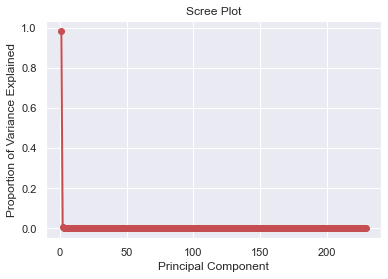

In [107]:
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'ro-', 
         linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained')
plt.show()

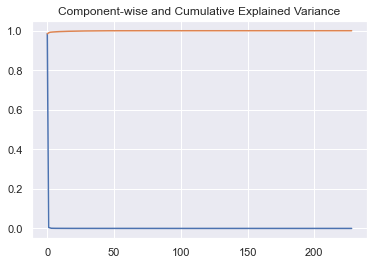

In [108]:
plt.plot(range(229), pca.explained_variance_ratio_)
plt.plot(range(229), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
plt.show()

In [109]:
# evaluate LDA using "fit" and "score" 
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['solver'] = ['svd']
# define search
search = GridSearchCV(LinearDiscriminantAnalysis(), grid, scoring='accuracy', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# report performance
print('LDA mean accuracy: %.3f' % results.best_score_)

LDA mean accuracy: 0.857


In [110]:
# evaluate pca using "fit" and "score" with logistic regression algorithm for classification
steps = [('pca', PCA(n_components=50)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# evaluate model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('PCA mean accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

PCA mean accuracy: 0.861 (0.022)


## 2.5 Feature Scaling

#### Feature scaling has been done for this dataset, hence it will be omitted in this preparation process. Its evident from the features that the values have been scaled from -1 to 1.

# 3.0 Machine learning Model Development

#### 3 different models will be utilized in this report.
 - Decision Tree
 - Random Forest 
 - Logistic Regression

They will be compared to one another to select the best model for this prediction

## 3.1 Decision Tree

In [139]:
#Independent Vector
X = df_cleaned[list(df_cleaned.columns)[:-1]].values
#Dependent Vector
y = df_cleaned[df_cleaned.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state=100)

In [159]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Checing accuracy of model
acc =  metrics.accuracy_score(y_test, y_pred)

In [160]:
print('accuracy ' +str(acc))
#print('average auc ' +str(roc_auc["average"]))
prfs = precision_recall_fscore_support(y_test, y_pred, labels = [0,1])
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('precision:',prfs[0] )
print('recall', prfs[1])
print('fscore', prfs[2])

accuracy 0.8363636363636363
precision: [0.87628866 0.71276596]
recall [0.90425532 0.65048544]
fscore [0.89005236 0.68020305]


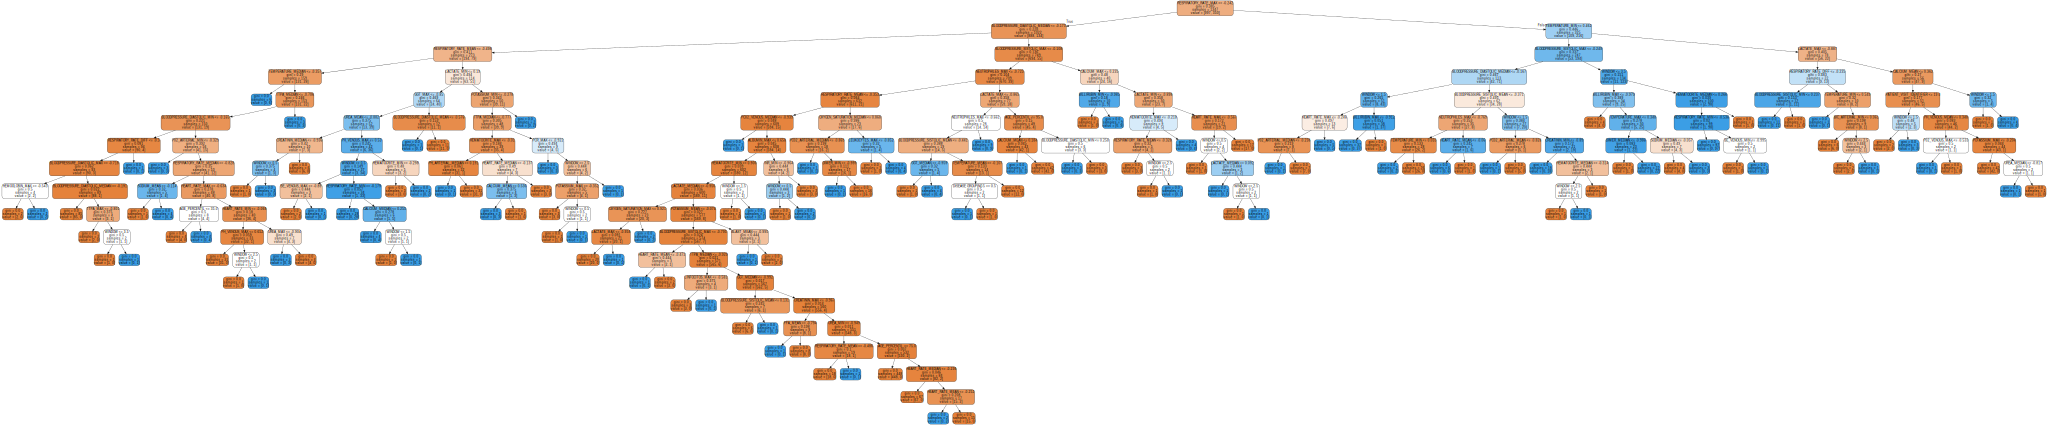

In [119]:
cols = list(X_train.columns.values)
dt_gini = tree.DecisionTreeClassifier(criterion='gini', )
dt_tree_gini = dt_gini.fit(X_train, y_train)
dot_data = tree.export_graphviz(
    dt_tree_gini, out_file=None, 
    feature_names=cols,filled=True, rounded=True)
graph = graphviz.Source(dot_data) 
graph

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.422571 to fit


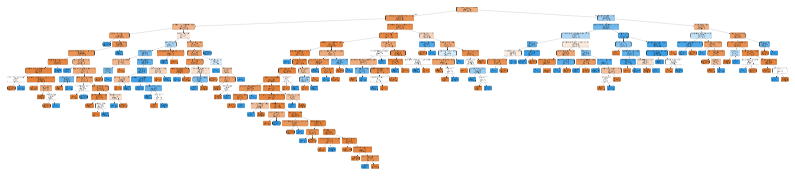

In [121]:
# Another method of displaying the decision tree with ability to control the figure size
cols = list(X_train.columns.values)
tree.export_graphviz(
    dt_tree_gini, out_file='tree.dot', 
    feature_names=cols,filled=True, rounded=True)

# Convert to png
!dot -Tpng tree.dot -o tree.png -Gdpi=600

# Display in python
plt.figure(figsize = (14, 18))
plt.imshow(plt.imread('tree.png'))
plt.axis('off');
plt.show();

## 3.1.1 Confusion Matrix

In [161]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[255,  27],
       [ 36,  67]], dtype=int64)

In [162]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89       282
           1       0.71      0.65      0.68       103

    accuracy                           0.84       385
   macro avg       0.79      0.78      0.79       385
weighted avg       0.83      0.84      0.83       385



#### Observation
 - non-admission into ICU had high precision, sensitivity(recall) and F1-score which can be traced back to the high variables with non admission into ICU, this can be optimized by balancing the target category in the train dataset or utilizing different window admission

# 3.2 Random Forest

In [153]:
model = RandomForestClassifier(n_jobs=64,n_estimators=200,criterion='entropy',oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc =  metrics.accuracy_score(y_test, y_pred)

In [154]:
print('accuracy ' +str(acc))
#print('average auc ' +str(roc_auc["average"]))
prfs = precision_recall_fscore_support(y_test, y_pred, labels = [0,1])
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('precision:',prfs[0] )
print('recall', prfs[1])
print('fscore', prfs[2])

accuracy 0.8961038961038961
precision: [0.90878378 0.85393258]
recall [0.95390071 0.73786408]
fscore [0.93079585 0.79166667]


## 3.2.1 Confusion matrix 

In [155]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[269,  13],
       [ 27,  76]], dtype=int64)

In [156]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       282
           1       0.85      0.74      0.79       103

    accuracy                           0.90       385
   macro avg       0.88      0.85      0.86       385
weighted avg       0.89      0.90      0.89       385



#### Observation
 - non-admission into ICU had high precision, sensitivity(recall) and F1-score which can be traced back to the high variables with non admission into ICU, this can be optimized by balancing the target category in the train dataset or utilizing different window admission

## 3.3 Logistic Regression

In [54]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
acc =  metrics.accuracy_score(y_test, y_pred)

C:\Users\rofia\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [55]:
print('accuracy ' +str(acc))
#print('average auc ' +str(roc_auc["average"]))
prfs = precision_recall_fscore_support(y_test, y_pred, labels = [0,1])
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('precision:',prfs[0] )
print('recall', prfs[1])
print('fscore', prfs[2])

accuracy 0.8545454545454545
precision: [0.88175676 0.76404494]
recall [0.92553191 0.66019417]
fscore [0.90311419 0.70833333]


## 3.3.1 Confusion matrix

In [56]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[261,  21],
       [ 35,  68]], dtype=int64)

In [142]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.89      0.88       282
           1       0.68      0.65      0.67       103

    accuracy                           0.83       385
   macro avg       0.78      0.77      0.77       385
weighted avg       0.82      0.83      0.82       385



#### Observation
 - non-admission into ICU had high precision, sensitivity(recall) and F1-score which can be traced back to the high variables with non admission into ICU, this can be optimized by balancing the target category in the train dataset or utilizing different window admission

### Removal of Redundant Variables
The 3 models were trained after removal of redundant varaibles that are not significant towards admission into ICU and compared to see which model predicted accurately.

In [195]:
df_new = df_cleaned.drop(columns=['AGE_ABOVE65','AGE_PERCENTIL', 'GENDER', 'HTN', 'WINDOW', "PATIENT_VISIT_IDENTIFIER"]) 
df_new

,DISEASE GROUPING 1,DISEASE GROUPING 2,DISEASE GROUPING 3,DISEASE GROUPING 4,DISEASE GROUPING 5,DISEASE GROUPING 6,IMMUNOCOMPROMISED,OTHER,ALBUMIN_MEDIAN,ALBUMIN_MEAN,...,RESPIRATORY_RATE_DIFF,TEMPERATURE_DIFF,OXYGEN_SATURATION_DIFF,BLOODPRESSURE_DIASTOLIC_DIFF_REL,BLOODPRESSURE_SISTOLIC_DIFF_REL,HEART_RATE_DIFF_REL,RESPIRATORY_RATE_DIFF_REL,TEMPERATURE_DIFF_REL,OXYGEN_SATURATION_DIFF_REL,ICU
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
1,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.605263,0.605263,...,0.176471,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,0
3,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,...,0.176471,-1.000000,-1.000000,-0.389967,0.407558,-0.230462,0.096774,-1.000000,-1.000000,0
4,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.000000,0.000000,...,0.176471,-0.238095,-0.818182,-0.389967,0.407558,-0.230462,0.096774,-0.242282,-0.814433,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1920,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
1921,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
1922,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0
1923,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.605263,0.605263,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0


In [196]:
#Independent Vector
X = df_cleaned[list(df_new.columns)[:-1]].values
#Dependent Vector
y = df_cleaned[df_new.columns[-1]].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, stratify=y, random_state=100)

### Decision Tree

In [197]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
#Checing accuracy of model
acc =  metrics.accuracy_score(y_test, y_pred)

In [198]:
print('accuracy ' +str(acc))
#print('average auc ' +str(roc_auc["average"]))
prfs = precision_recall_fscore_support(y_test, y_pred, labels = [0,1])
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('precision:',prfs[0] )
print('recall', prfs[1])
print('fscore', prfs[2])

accuracy 0.8363636363636363
precision: [0.8815331  0.70408163]
recall [0.89716312 0.66990291]
fscore [0.88927944 0.68656716]


#### Observation
 - The accuracy remained intact but the precision reduced, sensitivity and F-score of the model increased 

### Random Forest

In [199]:
model = RandomForestClassifier(n_jobs=64,n_estimators=200,criterion='entropy',oob_score=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc =  metrics.accuracy_score(y_test, y_pred)

In [200]:
print('accuracy ' +str(acc))
#print('average auc ' +str(roc_auc["average"]))
prfs = precision_recall_fscore_support(y_test, y_pred, labels = [0,1])
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('precision:',prfs[0] )
print('recall', prfs[1])
print('fscore', prfs[2])

accuracy 0.9012987012987013
precision: [0.91216216 0.86516854]
recall [0.95744681 0.74757282]
fscore [0.93425606 0.80208333]


#### Observation
 - The accuracy, precision and sensitivity were observed to reduce, while f-score increased

In [201]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
acc =  metrics.accuracy_score(y_test, y_pred)

In [202]:
print('accuracy ' +str(acc))
#print('average auc ' +str(roc_auc["average"]))
prfs = precision_recall_fscore_support(y_test, y_pred, labels = [0,1])
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print('precision:',prfs[0] )
print('recall', prfs[1])
print('fscore', prfs[2])

accuracy 0.8649350649350649
precision: [0.87337662 0.83116883]
recall [0.95390071 0.62135922]
fscore [0.91186441 0.71111111]


#### Observation
 - The accuracy, sensitivity and f-score reduced while precision increased

# 4.0 CONCLUSION

After development of the model utilizing all the variables/features, it was discovered that Random Forest had the greatest precision with 91% compared to the remaining two models. Upon removal of redundant variables that are insignificant towards admission into ICU, slight changes were observed in the confusion matrix. However, Random Forest still had the highest precision for both approach.